In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Bring in datasets
mask_data_path = "Resources\mask-use-by-county.csv"
county_data_path = "Resources\lat_lon_county.csv"
death_data_path= "Resources\cleaned_death_by_county.csv"

# Read the mask data, death data, and county data
mask_data = pd.read_csv(mask_data_path)
county_data= pd.read_csv(county_data_path)
death_data= pd.read_csv(death_data_path)

In [3]:
# Display the data table for preview
county_data.head()

,State,County,County_State,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude,countyFIPS,g
0,AL,Autauga County,"Autauga County, AL",1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440,1001,1001
1,AL,Baldwin County,"Baldwin County, AL",4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067,1003,1003
2,AL,Barbour County,"Barbour County, AL",2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104,1005,1005
3,AL,Bibb County,"Bibb County, AL",1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148,1007,1007
4,AL,Blount County,"Blount County, AL",1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440,1009,1009


In [4]:
# Display the data table for preview
death_data.head()

,countyFIPS,County Name,State,County_State,Deaths as of October 19 2020,countyFIPS.1
0,1,New York City Unallocated/Probable,NY,"New York City Unallocated/Probable, NY",22,1
1,1001,Autauga County,AL,"Autauga County, AL",28,1001
2,1003,Baldwin County,AL,"Baldwin County, AL",67,1003
3,1005,Barbour County,AL,"Barbour County, AL",9,1005
4,1007,Bibb County,AL,"Bibb County, AL",13,1007


In [5]:
# Rename columns
death_data= death_data.rename(columns={"countyFIPS": "County Code"})
county_data= county_data.rename(columns={"countyFIPS": "County Code"})
mask_data= mask_data.rename(columns={"COUNTYFP": "County Code"})

In [6]:
# Merge to get county deaths with lat long coordinates
county_death_merge= pd.merge(county_data, death_data, how= "left", on= ["County Code", "County Code"])

In [7]:
# Display the data table for preview
mask_data.head()

,County Code,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [8]:
# Add columns for Never/Rarely/Sometimes (doesn't wear a mask) and Frequently/Always (usually wears a mask)
mask_data["NO MASK"]= mask_data["NEVER"] + mask_data["RARELY"] + mask_data["SOMETIMES"]
mask_data["YES MASK"]= mask_data["FREQUENTLY"] + mask_data["ALWAYS"] 

mask_data.head()

,County Code,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NO MASK,YES MASK
0,1001,0.053,0.074,0.134,0.295,0.444,0.261,0.739
1,1003,0.083,0.059,0.098,0.323,0.436,0.240,0.759
2,1005,0.067,0.121,0.120,0.201,0.491,0.308,0.692
3,1007,0.020,0.034,0.096,0.278,0.572,0.150,0.850
4,1009,0.053,0.114,0.180,0.194,0.459,0.347,0.653


In [9]:
# DataFrame for plotting
mask_df= mask_data[["County Code", "NO MASK", "YES MASK"]]

mask_df.head()

,County Code,NO MASK,YES MASK
0,1001,0.261,0.739
1,1003,0.240,0.759
2,1005,0.308,0.692
3,1007,0.150,0.850
4,1009,0.347,0.653


In [10]:
# Merge to get county deaths with lat long coordinates
mask_merge= pd.merge(county_death_merge, mask_data, how= "left", on= ["County Code", "County Code"])

In [11]:
mask_merge.head()

,State_x,County,County_State_x,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Latitude,Longitude,County Code,...,County_State_y,Deaths as of October 19 2020,countyFIPS.1,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NO MASK,YES MASK
0,AL,Autauga County,"Autauga County, AL",1.539602e+09,25706961,594.444,9.926,32.532237,-86.646440,1001,...,"Autauga County, AL",28.0,1001.0,0.053,0.074,0.134,0.295,0.444,0.261,0.739
1,AL,Baldwin County,"Baldwin County, AL",4.117622e+09,1132980868,1589.823,437.446,30.659218,-87.746067,1003,...,"Baldwin County, AL",67.0,1003.0,0.083,0.059,0.098,0.323,0.436,0.240,0.759
2,AL,Barbour County,"Barbour County, AL",2.292160e+09,50523213,885.008,19.507,31.870253,-85.405104,1005,...,"Barbour County, AL",9.0,1005.0,0.067,0.121,0.120,0.201,0.491,0.308,0.692
3,AL,Bibb County,"Bibb County, AL",1.612167e+09,9602089,622.461,3.707,33.015893,-87.127148,1007,...,"Bibb County, AL",13.0,1007.0,0.020,0.034,0.096,0.278,0.572,0.150,0.850
4,AL,Blount County,"Blount County, AL",1.670104e+09,15015467,644.831,5.798,33.977358,-86.566440,1009,...,"Blount County, AL",23.0,1009.0,0.053,0.114,0.180,0.194,0.459,0.347,0.653


In [12]:
#Delete excess columns
del mask_merge["ALAND"]
del mask_merge["AWATER"]
del mask_merge["ALAND_SQMI"]
del mask_merge["AWATER_SQMI"]
del mask_merge["County_State_y"]
del mask_merge["countyFIPS.1"]
del mask_merge["g"]
del mask_merge["County Name"]
del mask_merge["State_y"]

In [13]:
# More cleaning
mask_merge= mask_merge.rename(columns={"State_x": "State",
                                      "County_State_x": "County_State",
                                      "Deaths as of October 19 2020": "Deaths"})

# Check
mask_merge.head()

,State,County,County_State,Latitude,Longitude,County Code,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NO MASK,YES MASK
0,AL,Autauga County,"Autauga County, AL",32.532237,-86.646440,1001,28.0,0.053,0.074,0.134,0.295,0.444,0.261,0.739
1,AL,Baldwin County,"Baldwin County, AL",30.659218,-87.746067,1003,67.0,0.083,0.059,0.098,0.323,0.436,0.240,0.759
2,AL,Barbour County,"Barbour County, AL",31.870253,-85.405104,1005,9.0,0.067,0.121,0.120,0.201,0.491,0.308,0.692
3,AL,Bibb County,"Bibb County, AL",33.015893,-87.127148,1007,13.0,0.020,0.034,0.096,0.278,0.572,0.150,0.850
4,AL,Blount County,"Blount County, AL",33.977358,-86.566440,1009,23.0,0.053,0.114,0.180,0.194,0.459,0.347,0.653


In [14]:
# Max deaths
mask_merge["Deaths"].max()


7288.0

In [15]:
mask_merge.dropna()

,State,County,County_State,Latitude,Longitude,County Code,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NO MASK,YES MASK
0,AL,Autauga County,"Autauga County, AL",32.532237,-86.646440,1001,28.0,0.053,0.074,0.134,0.295,0.444,0.261,0.739
1,AL,Baldwin County,"Baldwin County, AL",30.659218,-87.746067,1003,67.0,0.083,0.059,0.098,0.323,0.436,0.240,0.759
2,AL,Barbour County,"Barbour County, AL",31.870253,-85.405104,1005,9.0,0.067,0.121,0.120,0.201,0.491,0.308,0.692
3,AL,Bibb County,"Bibb County, AL",33.015893,-87.127148,1007,13.0,0.020,0.034,0.096,0.278,0.572,0.150,0.850
4,AL,Blount County,"Blount County, AL",33.977358,-86.566440,1009,23.0,0.053,0.114,0.180,0.194,0.459,0.347,0.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,WY,Sweetwater County,"Sweetwater County, WY",41.660328,-108.875677,56037,2.0,0.061,0.295,0.230,0.146,0.268,0.586,0.414
3134,WY,Teton County,"Teton County, WY",44.048662,-110.426087,16081,1.0,0.099,0.189,0.190,0.250,0.272,0.478,0.522
3135,WY,Uinta County,"Uinta County, WY",41.284726,-110.558947,56041,2.0,0.098,0.278,0.154,0.207,0.264,0.530,0.471
3136,WY,Washakie County,"Washakie County, WY",43.878831,-107.669052,56043,7.0,0.204,0.155,0.069,0.285,0.287,0.428,0.572


In [16]:
# Convert percents for easier plotting
mask_merge["NO MASK"]= mask_merge["NO MASK"]*100
mask_merge["YES MASK"]= mask_merge["YES MASK"]*100

In [17]:
mask_merge.head()

,State,County,County_State,Latitude,Longitude,County Code,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NO MASK,YES MASK
0,AL,Autauga County,"Autauga County, AL",32.532237,-86.646440,1001,28.0,0.053,0.074,0.134,0.295,0.444,26.1,73.9
1,AL,Baldwin County,"Baldwin County, AL",30.659218,-87.746067,1003,67.0,0.083,0.059,0.098,0.323,0.436,24.0,75.9
2,AL,Barbour County,"Barbour County, AL",31.870253,-85.405104,1005,9.0,0.067,0.121,0.120,0.201,0.491,30.8,69.2
3,AL,Bibb County,"Bibb County, AL",33.015893,-87.127148,1007,13.0,0.020,0.034,0.096,0.278,0.572,15.0,85.0
4,AL,Blount County,"Blount County, AL",33.977358,-86.566440,1009,23.0,0.053,0.114,0.180,0.194,0.459,34.7,65.3


In [18]:
mask_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3137
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         3138 non-null   object 
 1   County        3138 non-null   object 
 2   County_State  3138 non-null   object 
 3   Latitude      3138 non-null   float64
 4   Longitude     3138 non-null   float64
 5   County Code   3138 non-null   int64  
 6   Deaths        3137 non-null   float64
 7   NEVER         3138 non-null   float64
 8   RARELY        3138 non-null   float64
 9   SOMETIMES     3138 non-null   float64
 10  FREQUENTLY    3138 non-null   float64
 11  ALWAYS        3138 non-null   float64
 12  NO MASK       3138 non-null   float64
 13  YES MASK      3138 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 367.7+ KB


In [19]:
no_nulls=mask_merge.dropna()
no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3137 entries, 0 to 3137
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         3137 non-null   object 
 1   County        3137 non-null   object 
 2   County_State  3137 non-null   object 
 3   Latitude      3137 non-null   float64
 4   Longitude     3137 non-null   float64
 5   County Code   3137 non-null   int64  
 6   Deaths        3137 non-null   float64
 7   NEVER         3137 non-null   float64
 8   RARELY        3137 non-null   float64
 9   SOMETIMES     3137 non-null   float64
 10  FREQUENTLY    3137 non-null   float64
 11  ALWAYS        3137 non-null   float64
 12  NO MASK       3137 non-null   float64
 13  YES MASK      3137 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 367.6+ KB


The r-value is: 0.23338835690161833


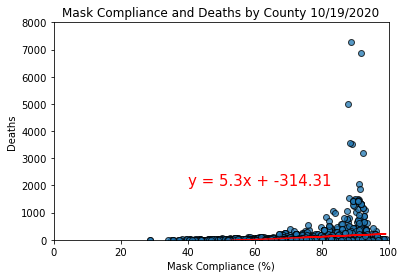

In [20]:
# Test correlation

# Variables
x_val= no_nulls["YES MASK"]
y_val= no_nulls["Deaths"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_val, y_val)

# Slope equation
regress_values = x_val * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,2000),fontsize=15,color="red")
plt.title("Mask Compliance and Deaths by County 10/19/2020")
plt.xlabel("Mask Compliance (%)")
plt.ylabel("Deaths")
plt.xlim(0, 100)
plt.ylim(-5, 8000)
print(f"The r-value is: {r}")
#plt.savefig("Mask Compliance and Deaths by County.png")
plt.show()

In [28]:
# Export to Excel
#no_nulls.to_csv("Masks_Deaths_Data.csv")

In [22]:
# Identify metro Atlanta counties for consideration
# Dekalb- 13089
# Fulton- 13121
# Cobb- 13067
# Gwinnett-13135
# Clayton- 13063
# Coweta- 13077
# Douglas-13097
# Fayette- 13113
# Henry-13151 

atlanta_counties= [13089, 13121, 13067, 13135, 13063, 13077, 13097, 13113, 13151]

In [23]:
# Convert original mask df for plotting counties
mask_data["NO MASK"]= mask_data["NO MASK"]*100
mask_data["YES MASK"]= mask_data["YES MASK"]*100

In [24]:
# DataFrame of only metro Atlanta counties
atl_df= mask_data.loc[mask_data["County Code"].isin(atlanta_counties)]
atl_df

,County Code,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,NO MASK,YES MASK
417,13063,0.038,0.054,0.125,0.159,0.624,21.7,78.3
419,13067,0.039,0.049,0.116,0.225,0.572,20.4,79.7
424,13077,0.105,0.053,0.183,0.204,0.455,34.1,65.9
430,13089,0.036,0.028,0.075,0.156,0.704,13.9,86.0
434,13097,0.083,0.037,0.090,0.198,0.591,21.0,78.9
442,13113,0.060,0.086,0.131,0.218,0.505,27.7,72.3
446,13121,0.026,0.036,0.089,0.187,0.662,15.1,84.9
453,13135,0.036,0.054,0.081,0.190,0.639,17.1,82.9
461,13151,0.103,0.048,0.091,0.181,0.578,24.2,75.9


In [25]:
# Plotting dataframe
atl_plot= atl_df[["County Code", "NO MASK", "YES MASK"]]
atl_plot= atl_plot.set_index("County Code")
atl_plot= atl_plot.rename(columns={"NO MASK": "Non-Compliance", "YES MASK": "Compliance"})

atl_plot

,Non-Compliance,Compliance
County Code,,
13063,21.7,78.3
13067,20.4,79.7
13077,34.1,65.9
13089,13.9,86.0
13097,21.0,78.9
13113,27.7,72.3
13121,15.1,84.9
13135,17.1,82.9
13151,24.2,75.9


In [26]:
# Merge to get deaths for Atlanta counties
atl_deaths= pd.merge(atl_plot, death_data, how= "left", on= ["County Code", "County Code"])
atl_deaths.dropna()
del atl_deaths["countyFIPS.1"]

In [27]:
# Rename for easier variables
atl_deaths= atl_deaths.rename(columns= {"Deaths as of October 19 2020": "Deaths"})
atl_deaths

,County Code,Non-Compliance,Compliance,County Name,State,County_State,Deaths
0,13063,21.7,78.3,Clayton County,GA,"Clayton County, GA",174
1,13067,20.4,79.7,Cobb County,GA,"Cobb County, GA",448
2,13077,34.1,65.9,Coweta County,GA,"Coweta County, GA",60
3,13089,13.9,86.0,DeKalb County,GA,"DeKalb County, GA",390
4,13097,21.0,78.9,Douglas County,GA,"Douglas County, GA",71
5,13113,27.7,72.3,Fayette County,GA,"Fayette County, GA",53
6,13121,15.1,84.9,Fulton County,GA,"Fulton County, GA",607
7,13135,17.1,82.9,Gwinnett County,GA,"Gwinnett County, GA",434
8,13151,24.2,75.9,Henry County,GA,"Henry County, GA",111


In [ ]:
# Export to Excel
#atl_deaths.to_csv("Atl_Deaths_Data.csv")

The r-value is: -0.7795543557020963


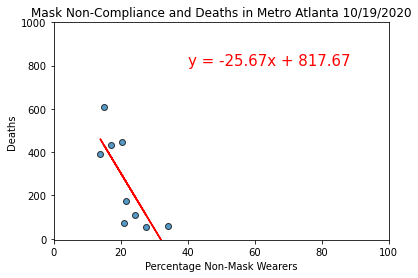

In [29]:
# Test metro Atlanta correlation

# Variables
x_val= atl_deaths["Non-Compliance"]
y_val= atl_deaths["Deaths"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_val, y_val)

# Slope equation
regress_values = x_val * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,800),fontsize=15,color="red")
plt.title("Mask Non-Compliance and Deaths in Metro Atlanta 10/19/2020")
plt.xlabel("Percentage Non-Mask Wearers")
plt.ylabel("Deaths")
plt.xlim(0, 100)
plt.ylim(-5, 1000)
print(f"The r-value is: {r}")
#plt.savefig("Mask Non-Compliance and Deaths in Metro Atlanta")
plt.show()

The r-value is: 0.7827738934056953


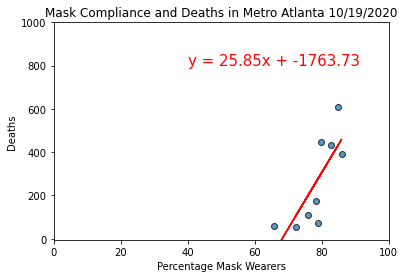

In [30]:
# Test metro Atlanta correlation

# Variables
x_val= atl_deaths["Compliance"]
y_val= atl_deaths["Deaths"]

# Perform linear regression
slope, intercept, r, p, stderr = linregress(x_val, y_val)

# Slope equation
regress_values = x_val * slope + intercept

# Add line  
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val, y_val, marker="o", alpha=.75, edgecolors="k")
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(40,800),fontsize=15,color="red")
plt.title("Mask Compliance and Deaths in Metro Atlanta 10/19/2020")
plt.xlabel("Percentage Mask Wearers")
plt.ylabel("Deaths")
plt.xlim(0, 100)
plt.ylim(-5, 1000)
print(f"The r-value is: {r}")
#plt.savefig("Mask Compliance and Deaths in Metro Atlanta")
plt.show()

([<matplotlib.axis.XTick at 0x21cb8108f60>,
 <a list of 9 Text major ticklabel objects>)

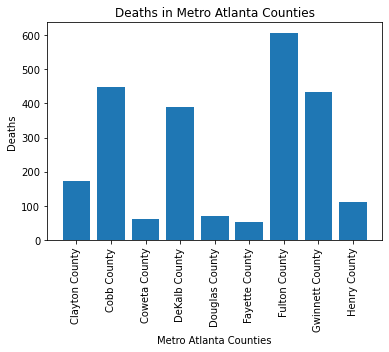

In [31]:
# Plot deaths by county
x_val= atl_deaths["County Name"]
y_val= atl_deaths["Deaths"]

plt.bar(x_val, y_val)

plt.xlabel("Metro Atlanta Counties")
plt.ylabel("Deaths")
plt.title("Deaths in Metro Atlanta Counties")

tick_locations = [value for value in x_val]
plt.xticks(tick_locations, rotation=90)

#plt.savefig("Deaths in Metro Atlanta Counties")

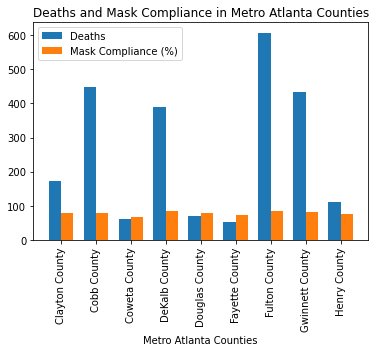

In [32]:
# Plot deaths and non-compliance by county
x_val= atl_deaths["County Name"]
deaths= atl_deaths["Deaths"]
mask= atl_deaths["Compliance"]
x= np.arange(len(x_val))
width=0.35

fig, ax= plt.subplots()
bar1= ax.bar(x- width/2, deaths, width, label= "Deaths")
bar2= ax.bar(x+ width/2, mask, width, label= "Mask Compliance (%)")

ax.set_xlabel("Metro Atlanta Counties")
ax.set_title("Deaths and Mask Compliance in Metro Atlanta Counties")
ax.set_xticks(x)
ax.set_xticklabels(x_val, rotation=90)
ax.legend()

#plt.savefig("Deaths and Mask Compliance in Metro Atlanta Counties")

plt.show()

In [33]:
# New df for better mask stacked bar
atl_masks= atl_deaths[["County Name", "Non-Compliance", "Compliance"]]
atl_masks= atl_masks.set_index("County Name")
atl_masks

,Non-Compliance,Compliance
County Name,,
Clayton County,21.7,78.3
Cobb County,20.4,79.7
Coweta County,34.1,65.9
DeKalb County,13.9,86.0
Douglas County,21.0,78.9
Fayette County,27.7,72.3
Fulton County,15.1,84.9
Gwinnett County,17.1,82.9
Henry County,24.2,75.9


In [34]:
# Export to Excel
#atl_masks.to_csv("Atl_Masks_Data.csv")

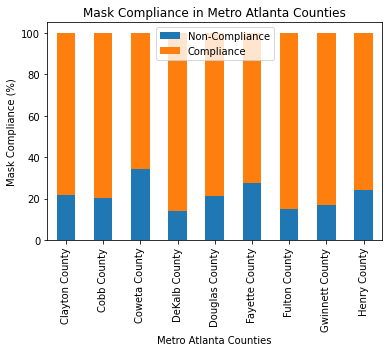

In [35]:
# Generate stacked bars showing percentage of mask wearers and non wearers by Atlanta county
atl_masks.plot(kind= "bar", stacked=True)

plt.xlabel("Metro Atlanta Counties")
plt.ylabel("Mask Compliance (%)")
plt.title("Mask Compliance in Metro Atlanta Counties")

#plt.savefig("Mask Compliance in Metro Atlanta Counties")

plt.show()